# Phenome-Wide analysis on TOPMed studies

# Environment set-up

### System requirements
- Python 3.6 or later
- pip & bash interpreter

### Installation of external dependencies

In [167]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
!pip install -r requirements.txt

  Cloning https://github.com/hms-dbmi/pic-sure-python-adapter-hpds.git to /private/var/folders/hm/wn0bpy0j7vl2q9gqnhhccpph0000gn/T/pip-req-build-mii200zg
  Running command git clone -q https://github.com/hms-dbmi/pic-sure-python-adapter-hpds.git /private/var/folders/hm/wn0bpy0j7vl2q9gqnhhccpph0000gn/T/pip-req-build-mii200zg
  Cloning https://github.com/hms-dbmi/pic-sure-python-client.git to /private/var/folders/hm/wn0bpy0j7vl2q9gqnhhccpph0000gn/T/pip-req-build-srub6a4p
  Running command git clone -q https://github.com/hms-dbmi/pic-sure-python-client.git /private/var/folders/hm/wn0bpy0j7vl2q9gqnhhccpph0000gn/T/pip-req-build-srub6a4p
  Created wheel for PicSureHpdsLib: filename=PicSureHpdsLib-0.9.0-py2.py3-none-any.whl size=17173 sha256=5613d08e3db3e52f31631d9924fe2b4265956eea4bd71a7f48748cf6bcafd1f6
  Stored in directory: /private/var/folders/hm/wn0bpy0j7vl2q9gqnhhccpph0000gn/T/pip-ephem-wheel-cache-pup8y1cs/wheels/6c/ac/12/4d142709d83e0bdd96c661e183f2dcbb0e03f90e98e5ac256e
  Created wh

In [170]:
import json
from pprint import pprint

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

import PicSureHpdsLib
import PicSureClient

from python_lib.utils import get_multiIndex_variablesDict, get_dic_renaming_vars, match_dummies_to_varNames, joining_variablesDict_onCol
from python_lib.HPDS_connection_manager import tokenManager

In [171]:
print("NB: This Jupyter Notebook has been written using PIC-SURE API following versions:\n- PicSureHpdsLib: 1.1.0\n- PicSureClient: 0.1.0")
print("The PIC-SURE API libraries versions you've been downloading are:\n- PicSureHpdsLib: {0}\n- PicSureClient: {1}".format(PicSureHpdsLib.__version__, PicSureClient.__version__))

NB: This Jupyter Notebook has been written using PIC-SURE API following versions:
- PicSureHpdsLib: 1.1.0
- PicSureClient: 0.1.0
The PIC-SURE API libraries versions you've been downloading are:
- PicSureHpdsLib: 1.1.0
- PicSureClient: 0.1.0


In [172]:
# Pandas DataFrame display options
pd.set_option("max.rows", 435)

# Matplotlib display parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
font = {'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)

## Connecting to a PIC-SURE network

In [173]:
PICSURE_network_URL = "https://biodatacatalyst.integration.hms.harvard.edu/picsure"
resource_id = "02e23f52-f354-4e8b-992c-d37c8b9ba140"
token_file = "token.txt"

In [174]:
token = tokenManager(token_file).get_token()


Security Token Imported Correctly


In [175]:
client = PicSureClient.Client()
connection = client.connect(PICSURE_network_URL, token, allowSelfSignedSSL=True)
adapter = PicSureHpdsLib.Adapter(connection)
resource = adapter.useResource(resource_id)

### 1. Retrieving variables dictionary from HPDS Database

In [176]:
plain_variablesDict = resource.dictionary().find().DataFrame()

In [177]:
plain_variablesDict.iloc[[1,2], :]

,min,categorical,observationCount,patientCount,max,HpdsDataType,categoryValues
KEY,,,,,,,
"\Atherosclerosis Risk in Communities (ARIC) Cohort\Subject Phenotype\Cohort Exam\ECG\ECG Data\Exam 3\Sociodemography and Administration\Major1: [Complete/Intermittent LBBB, Complete/Intermittent RBBB, Complete/Intermittent RBBB w/ Left A, Nonspecific Intraventricular Block] [ECG data, exam 3]\",NaN,True,489,489,NaN,phenotypes,"[Complete/Intermittent LBBB, Complete/Intermit..."
"\Atherosclerosis Risk in Communities (ARIC) Cohort\Subject Phenotype\Cohort Exam\Retinal\Retinal Vessel Measurements\Exam 3\RIP\RIPX92 [Retinal Vessel Measurements, exam 3]\",0.566,False,10351,10351,1.218,phenotypes,None


In [10]:
variablesDict = get_multiIndex_variablesDict(plain_variablesDict)

## Names of different studies

In [11]:
studies_names = variablesDict.index.get_level_values(0).unique()

In [12]:
pprint(studies_names)

Index(['Atherosclerosis Risk in Communities (ARIC) Cohort',
       'CCF AFIB GWAS study', 'Cardiovascular Health Study (CHS) Cohort',
       'DCC Harmonized data set', 'Framingham Cohort',
       'GeneSTAR NextGen Functional Genomics of Platelet Aggregation',
       'Genes-Environments and Admixture in Latino Asthmatics (GALA II) Study',
       'Genetic Epidemiology Network of Arteriopathy (GENOA)',
       'Genetic Epidemiology Network of Salt Sensitivity (GenSalt)',
       'Genetic Epidemiology of COPD (COPDGene)',
       'Genetics of Lipid Lowering Drugs and Diet Network (GOLDN) Lipidomics Study',
       'Genome-wide Association Study of Adiposity in Samoans',
       'Heart and Vascular Health Study (HVH)',
       'MGH Atrial Fibrillation Study',
       'Multi-Ethnic Study of Atherosclerosis (MESA) Cohort',
       'NHGRI Genome-Wide Association Study of Venous Thromboembolism (GWAS of VTE)',
       'NHLBI Cleveland Family Study (CFS) Candidate Gene Association Resource (CARe)',
     

In [13]:
mask_harmonized_variables = variablesDict.loc["DCC Harmonized data set", "simplified_varName"].str.match("^age.*")
harmonized_variables = variablesDict.loc["DCC Harmonized data set", "varName"].loc[~mask_harmonized_variables]
harmonized_variables_names = harmonized_variables.to_list()

## Name of harmonized studies

- NHLBI TOPMed: Genetics of Cardiometabolic Health in the Amish Atherosclerosis Risk in Communities (ARIC) Cohort
- Barbados Genetics of Asthma Study
- CARDIA Cohort
- Cleveland Clinic Atrial Fibrillation Study
- NHLBI Cleveland Family Study (CFS) Candidate Gene Association Resource (CARe) Cardiovascular Health Study (CHS) Cohort
- Genetic Epidemiology of COPD (COPDGene)
- NHLBI TOPMed: The Genetic Epidemiology of Asthma in Costa Rica
- Framingham Cohort
- Genetic Epidemiology Network of Arteriopathy (GENOA)
- Genetics of Lipid Lowering Drugs and Diet Network (GOLDN) Lipidomics Study Hispanic Community Health Study /Study of Latinos (HCHS/SOL)
- Heart and Vascular Health Study (HVH)
- Jackson Heart Study (JHS) Cohort
- NHGRI Genome-Wide Association Study of Venous Thromboembolism (GWAS of VTE) Multi-Ethnic Study of Atherosclerosis (MESA) Cohort
- Massachusetts General Hospital trial Fibrillation Study
- Partners HealthCare Biobank
- Study of African Americans, Asthma, Genes and Environment Study
- Genome-wide Association Study of Adiposity in Samoans
- The Vanderbilt AF Ablation Registry
- The Vanderbilt Atrial Fibrillation Registry
- Women’s Genome Health Study
- Women’s Health Initiative

# Multiple PheWAS

In [71]:
mask_harmonized = study_info_df["harmonized"] == True
mask_nb_var = study_info_df["number var"] < 2000
study_names = study_info_df.loc[mask_harmonized & mask_nb_var,:].index.tolist()

In [155]:
study_names

['CCF AFIB GWAS study',
 'Genetic Epidemiology Network of Arteriopathy (GENOA)',
 'Genetic Epidemiology of COPD (COPDGene)',
 'Genetics of Lipid Lowering Drugs and Diet Network (GOLDN) Lipidomics Study',
 'Genome-wide Association Study of Adiposity in Samoans',
 'Heart and Vascular Health Study (HVH)',
 'MGH Atrial Fibrillation Study',
 'NHLBI TOPMed: Partners HealthCare Biobank',
 'NHLBI TOPMed: Study of African Americans, Asthma, Genes and Environment (SAGE) Study',
 'NHLBI TOPMed: The Genetic Epidemiology of Asthma in Costa Rica',
 'NHLBI TOPMed: The Genetics and Epidemiology of Asthma in Barbados',
 'NHLBI TOPMed: The Vanderbilt AF Ablation Registry',
 'NHLBI TOPMed: The Vanderbilt Atrial Fibrillation Registry']

In [72]:
from python_lib.PheWAS_funcs import PheWAS

dependent_var_name = variablesDict\
           .loc[variablesDict.index.get_level_values(2) == 'Indicates whether subject ever regularly smoked cigarettes.', "varName"]\
           .values[0]
dic_pvalues = {}
for study_name in study_names:
    print(study_name)
    study_info_df = pd.read_csv("studies_info.csv", index_col=0)
    subject_id_var = study_info_df.loc[study_name, "ID varName"]
    dic_pvalues[study_name] = PheWAS(study_name,
       dependent_var_name, 
      study_info_df, 
      variablesDict, 
                    resource)

CCF AFIB GWAS study
subset_variablesDict shape: (14, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 2/2 [00:00<00:00, 173.81it/s]

Shape of retrieved HPDS dataframe (320042, 16)
dependent_var_name not in independent_var_names
subset_fact shape (543, 3)
Genetic Epidemiology Network of Arteriopathy (GENOA)
subset_variablesDict shape: (466, 9)
querying



/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,31,39,59,60,137,138,179,181,182,183,184,185,211,212,213,214,215,216,217,218,219,228,229,230,231,240,241,242,243,246,247,248,249,250,251,252,253,254,255,256,257,258,267,268,269,270,271,272,276,277,287,288,291,292,293,294,295,296,297,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,408,409,410,411,412,432,433,434,435,436,437,438,439,440,441,442,444,445,449,454,455,456,458,459,460,461,462,463) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
  0%|          | 0/452 [00:00<?, ?it/s]

Shape of retrieved HPDS dataframe (320042, 468)
dependent_var_name not in independent_var_names
subset_fact shape (3462, 453)


 12%|█▏        | 56/452 [00:02<00:18, 20.89it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 30%|███       | 136/452 [00:05<00:12, 26.04it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 39%|███▉      | 178/452 [00:07<00:08, 31.03it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 52%|█████▏    | 235/452 [00:09<00:06, 31.20it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/

Genetic Epidemiology of COPD (COPDGene)
subset_variablesDict shape: (341, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,5,7,8,9,11,12,14,15,16,17,18,33,35,36,39,40,41,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,117,118,120,121,122,123,124,125,126,129,130,134,135,137,149,150,154,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,177,180,181,182,185,186,187,188,194,197,198,199,200,202,203,204,205,207,208,209,210,211,213,215,216,217,219,220,222,224,225,226,227,228,229,230,231,232,234,235,236,237,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,261,262,263,264,265,266,267,289,290,309,320,338,339,340,341,342) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
  0%|          | 0/318 [00:00<?, ?it/s]

Shape of retrieved HPDS dataframe (320042, 343)
dependent_var_name not in independent_var_names
subset_fact shape (10003, 319)


100%|██████████| 318/318 [00:11<00:00, 28.52it/s]


Genetics of Lipid Lowering Drugs and Diet Network (GOLDN) Lipidomics Study
subset_variablesDict shape: (121, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,6,109,110,111,113,114,115,116,117,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
 21%|██        | 25/121 [00:00<00:00, 248.29it/s]

Shape of retrieved HPDS dataframe (320042, 123)
dependent_var_name not in independent_var_names
subset_fact shape (8544, 122)


100%|██████████| 121/121 [00:00<00:00, 225.36it/s]


Genome-wide Association Study of Adiposity in Samoans
subset_variablesDict shape: (174, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,6,8,13,19,20,21,23,24,25,26,27,28,29,42,58,59,60,61,79,80,81,82,83,84,94,95,96,97,98,99,100,101,102,103,104,105,111,113,117,123,124,125,140,141,142,143,144,145,146,147,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,171,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
  2%|▏         | 4/168 [00:00<00:04, 39.08it/s]

Shape of retrieved HPDS dataframe (320042, 176)
dependent_var_name not in independent_var_names
subset_fact shape (3504, 169)


 36%|███▌      | 60/168 [00:01<00:03, 32.07it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 45%|████▍     | 75/168 [00:02<00:03, 28.05it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 46%|████▋     | 78/168 [00:02<00:03, 27.83it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihoo

Heart and Vascular Health Study (HVH)
subset_variablesDict shape: (38, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,5,9,11,12,15,16,18,22,25,27,28,29,32,34,35,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
 14%|█▎        | 5/37 [00:00<00:00, 46.87it/s]

Shape of retrieved HPDS dataframe (320042, 40)
dependent_var_name not in independent_var_names
subset_fact shape (1204, 38)


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100%|██████████| 37/37 [00:00<00:00, 46.04it/s]


MGH Atrial Fibrillation Study
subset_variablesDict shape: (35, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,14,15,16,17,18,25,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 31/31 [00:00<00:00, 210.15it/s]

Shape of retrieved HPDS dataframe (320042, 37)
dependent_var_name not in independent_var_names
subset_fact shape (1025, 32)


NHLBI TOPMed: Partners HealthCare Biobank
subset_variablesDict shape: (32, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,7,9,10,11,12,15,16,17,18,19,20,22,23,24,25,26,27,28,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 29/29 [00:00<00:00, 252.53it/s]

Shape of retrieved HPDS dataframe (320042, 34)
dependent_var_name not in independent_var_names
subset_fact shape (129, 30)


NHLBI TOPMed: Study of African Americans, Asthma, Genes and Environment (SAGE) Study
subset_variablesDict shape: (28, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (2,4,5,6,10,11,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 23/23 [00:00<00:00, 235.88it/s]

Shape of retrieved HPDS dataframe (320042, 30)
dependent_var_name not in independent_var_names
subset_fact shape (2107, 24)


NHLBI TOPMed: The Genetic Epidemiology of Asthma in Costa Rica
subset_variablesDict shape: (38, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,3,4,5,10,13,15,16,17,18,19,20,21,22,24,25,26,27,28,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
  0%|          | 0/20 [00:00<?, ?it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 20%|██        | 4/20 [00:00<00:00, 30.07it/s]

Shape of retrieved HPDS dataframe (320042, 40)
dependent_var_name not in independent_var_names
subset_fact shape (3789, 21)


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 90%|█████████ | 18/20 [00:00<00:00, 36.32it/s]/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
1

NHLBI TOPMed: The Genetics and Epidemiology of Asthma in Barbados
subset_variablesDict shape: (54, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,4,10,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,35,36,37,38,39,40,42,43,44,45,46,47,48,49,50,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 39/39 [00:00<00:00, 259.92it/s]

Shape of retrieved HPDS dataframe (320042, 56)
dependent_var_name not in independent_var_names
subset_fact shape (1857, 40)


NHLBI TOPMed: The Vanderbilt AF Ablation Registry
subset_variablesDict shape: (31, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,2,3,6,9,10,11,12,15,16,17,18,19,20,21,23,24,26,27,28,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 30/30 [00:00<00:00, 244.12it/s]

Shape of retrieved HPDS dataframe (320042, 33)
dependent_var_name not in independent_var_names
subset_fact shape (173, 31)


NHLBI TOPMed: The Vanderbilt Atrial Fibrillation Registry
subset_variablesDict shape: (31, 9)
querying


/Users/Arnaud/miniconda3/envs/dbmi_jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:15: DtypeWarning: Columns (1,4,5,8,9,10,11,12,15,16,17,18,19,20,22,23,24,25,26,27,28,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app
100%|██████████| 28/28 [00:00<00:00, 230.12it/s]

Shape of retrieved HPDS dataframe (320042, 33)
dependent_var_name not in independent_var_names
subset_fact shape (1135, 29)


In [77]:
list_study_names = [] 
list_frames = []
for study_name, study_pvalues in dic_pvalues.items():
    list_study_names.append(study_name)
    list_frames.append(pd.DataFrame.from_dict(study_pvalues, orient='index'))
df_pvalues = pd.concat(list_frames, keys=list_study_names)
df_pvalues = df_pvalues.rename_axis(index=["study", "varName"])\
.reset_index("varName", drop=False)\
.rename({0: "pvalues"}, axis=1)



### Distribution of p-values (univariate tests)

Text(0.5, 0.98, 'Distribution of individual p-values')

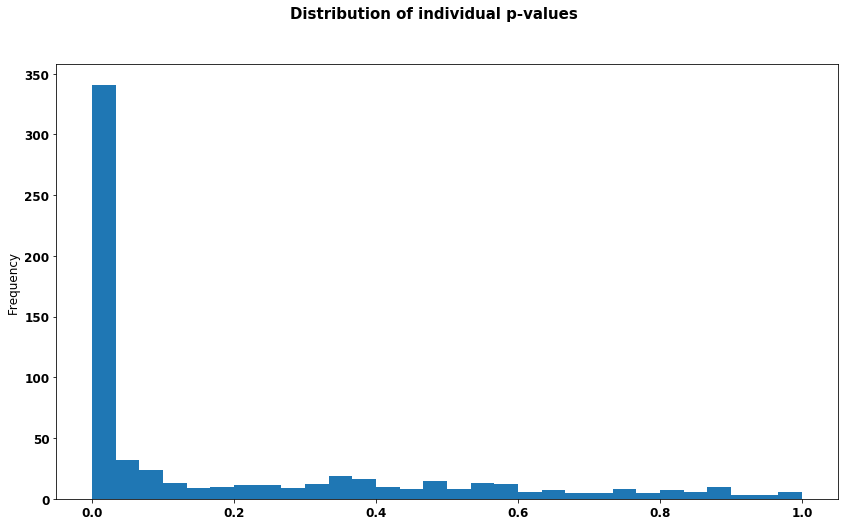

In [81]:
pd.Series([v for v in df_pvalues["pvalues"].values]).plot.hist(bins=30)
plt.suptitle("Distribution of individual p-values",
             weight="bold",
            fontsize=15)

### 5. Multiple hypotheses testing correction: Bonferroni Method

In order to handle the multiple testing problem (increase in the probability to "discover" false statistical associations), we will use the Bonferroni correction method. Although many other multiple comparisons exist, Bonferroni is the most straightforward to use, because it doesn't require assumptions about variables correlation. Other PheWAS analysis also use False Discovery Rate controlling procedures ([see](https://en.wikipedia.org/wiki/False_discovery_rate)).

In a nutshell, Bonferonni allows to calculate a corrected "statistical significant threshold" according to the number of test performed. Every p-value below this threshold will be deemed statistically significant.

In [82]:
adjusted_alpha = 0.05/len(df_pvalues["pvalues"])

In [153]:
%%capture
df_pvalues["p_adj"] = df_pvalues["pvalues"] / len(df_pvalues["pvalues"])
df_pvalues['log_p'] = -np.log10(df_pvalues['pvalues'])
df_pvalues = df_pvalues.sort_index()
df_pvalues["group"] = df_pvalues.index
variablesDict = joining_variablesDict_onCol(variablesDict,
                                              df_pvalues,
                                              left_col="varName",
                                              right_col="varName")

In [84]:
print("Bonferonni adjusted significance threshold: {0:.2E}".format(adjusted_alpha))

Bonferonni adjusted significance threshold: 3.85E-05


## 6. Result visualisations: Manhattan plot

Manhattan plot is the classical results representation of a PheWAS analysis. It plots every each tested phenotypical variables on the X-axis, against its *-log(pvalue)* on the Y-axis. The horizontal line represent the adjusted significance level threshold.

In [87]:
mask = variablesDict["pvalues"].isna()
df_results = variablesDict.loc[~mask,:].copy().replace([np.inf, -np.inf], np.nan)
df_results = df_results.loc[~df_results["log_p"].isna().values,:]

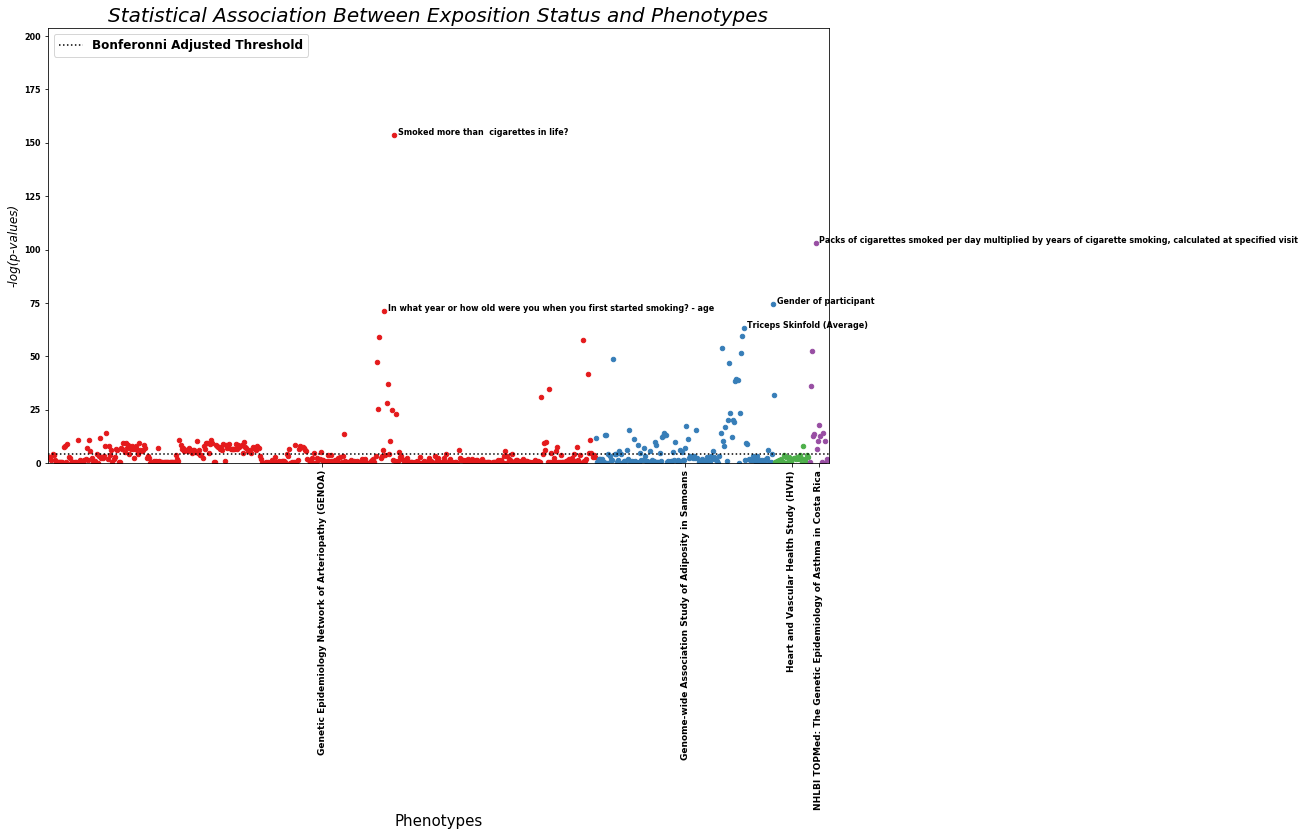

In [152]:
df_results["simplified_varName"] = df_results["simplified_varName"].str.replace("[0-9]+[A-z]*", "").to_frame()
order_studies = df_results.index.get_level_values(0).unique().tolist()[::-1]
df_results = df_results.reindex(order_studies, level=0)
fig = plt.figure()
ax = fig.add_subplot(111)
colors = plt.get_cmap('Set1')
x_labels = []
x_labels_pos = []

y_lims = (0, df_results["log_p"].max(skipna=True) + 50)
threshold_top_values = df_results["log_p"].sort_values(ascending=False)[0:6][-1]

df_results["ind"] = np.arange(1, len(df_results)+1)
#df_results["group"] = df_results["group"].str.replace("[0-9]", "")
df_grouped = df_results.groupby(('group'))
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='log_p',color=colors.colors[num % len(colors.colors)], ax=ax, s=20)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2)) # Set label in the middle

    pair_ind = 0 # To shift label which might overlap because to close
    for n, row in group.iterrows():
#        if pair_ind %2 == 0:
#            shift = 1.1
#        else:
#            shift = -1.1
        if row["log_p"] > threshold_top_values:
            ax.text(row['ind'] + 3, row["log_p"] + 0.05, row["simplified_varName"], rotation=0, alpha=1, size=8, color="black")
#            pair_ind += 1
                
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)
ax.set_xlim([0, len(df_results) +1])
ax.set_ylim(y_lims)
ax.set_ylabel('-log(p-values)', style="italic")
ax.set_xlabel('Phenotypes', fontsize=15)
ax.axhline(y=-np.log10(adjusted_alpha), linestyle=":", color="black", label="Bonferonni Adjusted Threshold")
plt.xticks(fontsize = 9,rotation=90)
plt.yticks(fontsize = 8)
plt.title("Statistical Association Between Exposition Status and Phenotypes", 
          loc="center",
          style="oblique", 
          fontsize = 20,
         y=1)
xticks = ax.xaxis.get_major_ticks()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels, loc = "upper left")
plt.show()

Overall, it appears that most of the tested phenotypes covariates are above the adjusted threshold of significant association. However, it is not surprising at all, given the nature of our dependent variable: a lot of those variables are by nature tied directly to the COPD status.

This code can be used directly with any other variable present in the variable Dictionary. It only need to change the `dependent_var_name` value.

# Odds Ratio table

In [158]:
- Univarai

(48459, 13)

In [ ]:

query = query.select().add(variables)